In [1]:
from IPython.display import HTML
from subprocess import getoutput
s = getoutput('nvidia-smi')
if 'K80' in s:
  gpu = 'K80'
elif 'T4' in s:
  gpu = 'T4'
elif 'P100' in s:
  gpu = 'P100'
display(HTML(f"<h2>{gpu}</h2>"))
print(s)
# or simply
!nvidia-smi -L

Sun Jun 27 09:54:54 2021       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 465.27       Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   46C    P8     9W /  70W |      0MiB / 15109MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [2]:
!unzip /content/drive/MyDrive/Braille/models/data/number.zip

Streaming output truncated to the last 5000 lines.
  inflating: train/60/01_0001_1_18_0916_0389_60.png  
  inflating: train/60/01_0001_1_18_0916_0390_60.png  
  inflating: train/60/01_0001_1_18_0916_0393_60.png  
  inflating: train/60/01_0001_1_18_0916_0395_60.png  
  inflating: train/60/01_0001_1_18_0916_0397_60.png  
  inflating: train/60/01_0001_1_18_0916_1864_60.png  
  inflating: train/60/01_0001_1_18_0916_1869_60.png  
  inflating: train/60/01_0001_1_18_0916_1880_60.png  
  inflating: train/60/01_0001_1_18_0916_1885_60.png  
  inflating: train/60/01_0001_1_18_0916_1900_60.png  
  inflating: train/60/01_0001_1_18_0916_1953_60.png  
  inflating: train/60/01_0001_1_18_0916_1972_60.png  
  inflating: train/60/01_0001_1_19_0916_0016_60.png  
  inflating: train/60/01_0001_1_19_0916_0085_60.png  
  inflating: train/60/02_0002_0_06_1016_1641_60.png  
  inflating: train/60/02_0002_0_08_1016_1637_60.png  
  inflating: train/60/02_0002_0_10_1116_1993_60.png  
  inflating: train/60/02_0002_0

In [3]:
!unzip /content/drive/MyDrive/Braille/models/data/number.zip >  /dev/null

replace train/51/01_0001_0_08_0916_1990_51.png? [y]es, [n]o, [A]ll, [N]one, [r]ename: A


In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sn
import skimage.io
import os 
import tqdm
import glob
import tensorflow 

from tqdm import tqdm
from sklearn.utils import shuffle
from sklearn import metrics
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.model_selection import train_test_split

from skimage.io import imread, imshow
from skimage.transform import resize
from skimage.color import grey2rgb

import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing import image_dataset_from_directory
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import InputLayer, BatchNormalization, Dropout, Flatten, Dense, Activation, MaxPool2D, Conv2D
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
from tensorflow.keras.applications.resnet50 import ResNet50
from tensorflow.keras.utils import to_categorical
from keras import optimizers
from tensorflow.keras.optimizers import Adam
from keras.applications.nasnet import NASNetLarge, NASNetMobile
from keras.callbacks import Callback,ModelCheckpoint,ReduceLROnPlateau
from keras.models import Sequential,load_model
from keras.layers import Dense, Dropout
from keras.wrappers.scikit_learn import KerasClassifier
import keras.backend as K

#import tensorflow_addons as tfa
#from tensorflow.keras.metrics import Metric
#from tensorflow_addons.utils.types import AcceptableDTypes, FloatTensorLike
from typeguard import typechecked
from typing import Optional

In [5]:
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Activation
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.layers import MaxPooling2D
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.optimizers import Adagrad
from tensorflow.keras.optimizers import Adadelta
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [6]:
from keras.applications.vgg16 import VGG16
from tensorflow.keras.preprocessing import image
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D

In [7]:
SIZE = 32  #Resize images

In [8]:
#Capture training data and labels into respective lists
train_images = []
train_labels = [] 

for folder in os.listdir('train'):
    for file in os.listdir(os.path.join('train', folder)):
        if (file.endswith("png")):
            train_labels.append(folder)
            img = cv2.imread(os.path.join('train', folder, file))
            img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
            im = cv2.resize(img_rgb, (SIZE,SIZE))
            train_images.append(im)
        else:
            continue

        #Convert lists to arrays        
train_images = np.array(train_images)
train_labels = np.array(train_labels)

In [9]:
print('train images shape =',train_images.shape)
print('train labels shape =',train_labels.shape)

train images shape = (15778, 32, 32, 3)
train labels shape = (15778,)


In [10]:
test_images = []
test_labels = [] 

for folder in os.listdir('test'):
    for file in os.listdir(os.path.join('test', folder)):
        if (file.endswith("png")):
            test_labels.append(folder)
            img = cv2.imread(os.path.join('test', folder, file))
            img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
            im = cv2.resize(img_rgb, (SIZE,SIZE))
            test_images.append(im)
        else:
            continue


        #Convert lists to arrays                
test_images = np.array(test_images)
test_labels = np.array(test_labels)

In [11]:
print('test images shape =',test_images.shape)
print('test labels shape =',test_labels.shape)

test images shape = (3970, 32, 32, 3)
test labels shape = (3970,)


In [12]:
#Encode labels from text to integers.
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
le.fit(test_labels)
test_labels_encoded = le.transform(test_labels)
le.fit(train_labels)
train_labels_encoded = le.transform(train_labels)
#it make the data calass name to numerical formate like 1,2,3,4 for calculation purpose

In [13]:
#One hot encode y values for neural network. make tahe numamic class in a matrix
from keras.utils.np_utils import to_categorical
y_train_one_hot = to_categorical(train_labels_encoded)
y_test_one_hot = to_categorical(test_labels_encoded)

**start vgg 16** **model** **bold text**

In [14]:
X_train, X_test, y_train, y_test = train_images, test_images,y_train_one_hot, y_test_one_hot

In [15]:
# Normalize pixel values to between 0 and 1
X_train, X_test = X_train / 255.0, X_test / 255.0

In [16]:
###########################################################################################################
from tensorflow.keras.applications.inception_v3 import InceptionV3
from keras.layers import Input, Dense, Activation, GlobalAveragePooling2D
from keras.models import Model
from tensorflow.keras.applications.inception_v3 import InceptionV3
from tensorflow.keras.preprocessing import image
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D
import tensorflow as tf
from tensorflow.keras.applications import DenseNet201


model = tf.keras.applications.VGG16( include_top=False, input_shape=(SIZE, SIZE, 3),weights='imagenet')

############################################################################################################

58892288/58889256 [==============================] - 0s 0us/step


In [17]:
model.summary()

Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 32, 32, 3)]       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 32, 32, 64)        1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 32, 32, 64)        36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 16, 16, 64)        0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 16, 16, 128)       73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 16, 16, 128)       147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 8, 8, 128)         0     

In [18]:
# don't train existing weights
for layer in model.layers:
    layer.trainable = False

In [19]:
# our layers - you can add more if you want
x = Flatten()(model.output)

In [20]:
prediction = Dense(10, activation='softmax')(x)

# create a model object
model = Model(inputs=model.input, outputs=prediction)

In [21]:
datagen = ImageDataGenerator(
        rotation_range=20,
        zoom_range = 0.20,
        width_shift_range=0.3,
        height_shift_range=0.3,
        horizontal_flip=True,
        vertical_flip=True)

datagen.fit(X_train)

In [22]:
# tell the model what cost and optimization method to use
model.compile(
  loss='categorical_crossentropy',
  optimizer='adam',
  metrics=['accuracy']
)


In [23]:
batch_size=128
epochs=256
history = model.fit(
    datagen.flow(X_train,y_train, batch_size=batch_size),
    epochs = epochs,
    validation_data = (X_test,y_test),
    verbose=1
)

Epoch 1/256
124/124 [==============================] - 40s 76ms/step - loss: 1.8169 - accuracy: 0.4127 - val_loss: 1.4666 - val_accuracy: 0.5554
Epoch 2/256
124/124 [==============================] - 9s 71ms/step - loss: 1.4153 - accuracy: 0.5589 - val_loss: 1.1998 - val_accuracy: 0.6481
Epoch 3/256
124/124 [==============================] - 9s 69ms/step - loss: 1.2787 - accuracy: 0.5980 - val_loss: 1.0758 - val_accuracy: 0.6909
Epoch 4/256
124/124 [==============================] - 8s 67ms/step - loss: 1.2025 - accuracy: 0.6122 - val_loss: 0.9915 - val_accuracy: 0.7088
Epoch 5/256
124/124 [==============================] - 8s 68ms/step - loss: 1.1541 - accuracy: 0.6274 - val_loss: 0.9125 - val_accuracy: 0.7305
Epoch 6/256
124/124 [==============================] - 8s 68ms/step - loss: 1.1166 - accuracy: 0.6387 - val_loss: 0.8849 - val_accuracy: 0.7317
Epoch 7/256
124/124 [==============================] - 8s 68ms/step - loss: 1.0943 - accuracy: 0.6417 - val_loss: 0.8396 - val_accuracy

In [24]:
model.save('number_vgg16_b128_e256.h5')

In [25]:
!gsutil cp -r /content/number_vgg16_b128_e256.h5 /content/drive/MyDrive/Braille/models/h5/

Copying file:///content/number_vgg16_b128_e256.h5...
/ [1 files][ 56.3 MiB/ 56.3 MiB]                                                
Operation completed over 1 objects/56.3 MiB.                                     


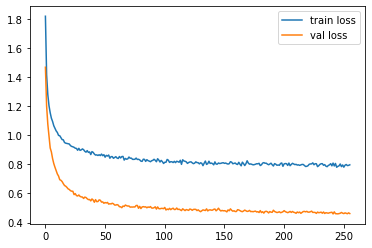

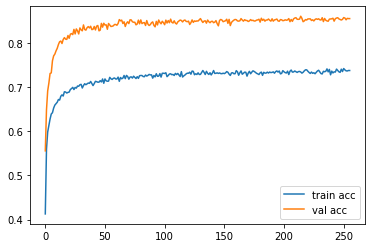

<Figure size 432x288 with 0 Axes>

In [26]:
r=history
import matplotlib.pyplot as plt
# plot the loss
plt.plot(r.history['loss'], label='train loss')
plt.plot(r.history['val_loss'], label='val loss')
plt.legend()
plt.show()
plt.savefig('LossVal_loss')

# plot the accuracy
plt.plot(r.history['accuracy'], label='train acc')
plt.plot(r.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()
plt.savefig('AccVal_acc')


In [27]:
X_test_vgg_prediction = model.predict(X_test)

In [28]:
X_test_name_vgg_prediction=[]
categories = np.sort(os.listdir('test'))

i=0
for i in range(len(X_test_vgg_prediction)):
    temp = categories[np.argmax(X_test_vgg_prediction[i])] 
    X_test_name_vgg_prediction.append(temp)
X_test_name_vgg_prediction = np.array(X_test_name_vgg_prediction)

In [29]:
true = 0
false = 0
for i in range(len(test_labels)):
    if(X_test_name_vgg_prediction[i]==test_labels[i]):
        true=true+1
    else:
        false=false+1
        
print('true =',true)
print('false=',false)

true = 3393
false= 577


In [30]:
#Print overall accuracy
from sklearn import metrics
print ("Accuracy = ", metrics.accuracy_score(test_labels, X_test_name_vgg_prediction))

Accuracy =  0.8546599496221663


In [31]:
from sklearn.metrics import confusion_matrix , classification_report
import numpy as np

print("Classification Report: \n",classification_report(test_labels, X_test_name_vgg_prediction))

Classification Report: 
               precision    recall  f1-score   support

          51       0.92      0.95      0.94       397
          52       0.74      0.85      0.79       397
          53       0.88      0.86      0.87       397
          54       0.82      0.88      0.85       397
          55       0.96      0.97      0.97       397
          56       0.81      0.84      0.83       397
          57       0.91      0.79      0.85       397
          58       0.89      0.87      0.88       397
          59       0.94      0.78      0.85       397
          60       0.72      0.74      0.73       397

    accuracy                           0.85      3970
   macro avg       0.86      0.85      0.86      3970
weighted avg       0.86      0.85      0.86      3970



In [32]:
y_true = test_labels
y_pred = X_test_name_vgg_prediction

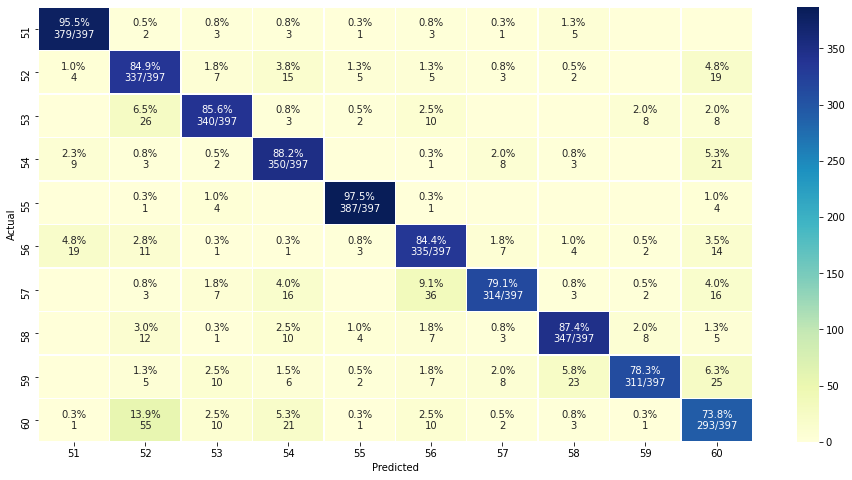

In [34]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.metrics import confusion_matrix

def plot_cm(y_true, y_pred, figsize=(16,8)):
    cm = confusion_matrix(y_true, y_pred, labels=np.unique(y_true))
    cm_sum = np.sum(cm, axis=1, keepdims=True)
    cm_perc = cm / cm_sum.astype(float) * 100
    annot = np.empty_like(cm).astype(str)
    nrows, ncols = cm.shape
    for i in range(nrows):
        for j in range(ncols):
            c = cm[i, j]
            p = cm_perc[i, j]
            if i == j:
                s = cm_sum[i]
                annot[i, j] = '%.1f%%\n%d/%d' % (p, c, s)
            elif c == 0:
                annot[i, j] = ''
            else:
                annot[i, j] = '%.1f%%\n%d' % (p, c)
    cm = pd.DataFrame(cm, index=np.unique(y_true), columns=np.unique(y_true))
    cm.index.name = 'Actual'
    cm.columns.name = 'Predicted'
    fig, ax = plt.subplots(figsize=figsize)
    sns.heatmap(cm, cmap= "YlGnBu", annot=annot, fmt='', linewidths=.5, ax=ax)
    
plot_cm(y_true, y_pred)